In [279]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import json

In [280]:
#  Bluetooth bug circumnavigate
options = webdriver.ChromeOptions() 
options.add_experimental_option("excludeSwitches", ["enable-logging"])



In [281]:
ScrollNumber = 2  # The depth we wish to load
sleepTimer = 1    # Waiting 1 second for page to load
pageNumber = 30

searchList = ["cow", "rabbit", "lamb", "cat", "monkey", "fish", "dog", "horse", "bird"]
dicoLink = {clef : [] for clef in searchList}

Le code principal qui ouvre un driver chrome et effectue les recherches sur internet pour récupérer les images : 

In [282]:
driver = webdriver.Chrome(options=options)  # path=r'to/chromedriver.exe'

for var in searchList:
    #  Any infinity scroll URL

    for page in range(pageNumber):
        url = "https://fr.freepik.com/photos-vecteurs-libre/coloriages-imprimer-" + var + "/" + str(page+1)
        driver.get(url)

        for _ in range(0,ScrollNumber):
            driver.execute_script("window.scrollTo(1,5000)")
            print("scrolling")
            time.sleep(sleepTimer)

        soup = BeautifulSoup(driver.page_source,'html.parser')

        for link in soup.find_all('img'):
            linkImage = link.get('src')
            dicoLink[var].append(linkImage)

print(dicoLink)
with open('dictionnaireLienImagesAnimaux.json', 'w') as fichier:
    json.dump(dicoLink, fichier)

scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling
scrolling


KeyboardInterrupt: 

Il faut maintenant filtrer les liens obtenus : on ne garde que ceux qui contiennent le mot cléf vecteurs :

In [ ]:

def isAbout(contextList, irrelevantList, url):                            #pas sûr de comment faire les choses bien pour le moment mais on garde l'idée
    boolRet = False
    for element in contextList:
        if(element in url):
            print(element in url, " : ", element, "  : ", url)
            boolRet= True
    for element in irrelevantList:
        if(element in url):
            print(element in url, " : ", element, "  : ", url)
            boolRet= False   
    if 'jpg' not in url or 'img' not in url:
        boolRet = False
    return boolRet

In [ ]:
with open('dictionnaireLienImagesAnimaux.json', 'r') as fichier:
    dicoLink = json.load(fichier)

relevantList = ["cow", "rabbit", "lamb", "cat", "monkey", "fish", "dog", "horse",  "bird", "vache", "lapin", "mouton", "agneau", "chat", "chien", "poisson", "cheval", "oiseau", "singe"]
irrelevantList = ["twitter", "analytics", "Twitter"]
dicoLinkClean = {}
for clef, valeur in dicoLink.items():
    valeur = valeur[6:-5]                           #enlève les images téléchargées sur Freepick inutiles (logos, image de base, ...) 
    valeurClean = [linkClean for linkClean in valeur if ('vecteurs' in linkClean and isAbout(relevantList, irrelevantList, linkClean))]
    dicoLinkClean[clef] = valeurClean

print(dicoLinkClean)

True  :  vache   :  https://img.freepik.com/vecteurs-libre/illustration-contour-vache-dessine-main_23-2149309137.jpg?semt=ais_hybrid
True  :  vache   :  https://img.freepik.com/vecteurs-libre/illustration-contour-vache-dessine-main_23-2149291238.jpg?semt=ais_hybrid
True  :  vache   :  https://img.freepik.com/vecteurs-libre/illustration-contour-vache-dessine-main_23-2149296563.jpg?semt=ais_hybrid
True  :  vache   :  https://img.freepik.com/vecteurs-libre/contour-vache-design-plat-dessine-main_23-2149261305.jpg?semt=ais_hybrid
True  :  vache   :  https://img.freepik.com/vecteurs-libre/illustration-contour-vache-dessine-main_23-2149291237.jpg?semt=ais_hybrid
True  :  vache   :  https://img.freepik.com/vecteurs-premium/page-coloriage-vaches-pour-enfants_793248-210.jpg?semt=ais_hybrid
True  :  vache   :  https://img.freepik.com/vecteurs-libre/contour-vache-design-plat-dessine-main_23-2149257990.jpg?semt=ais_hybrid
True  :  vache   :  https://img.freepik.com/vecteurs-premium/joli-doodle-vach

On peut maintenant télécharger et enregistrer des des dossiers adaptés les images :

In [ ]:
import requests
import os

def telecharger_image(url, chemin_fichier):
    try:
        # Envoyer une requête GET à l'URL
        reponse = requests.get(url, stream=True)
        reponse.raise_for_status()  # Vérifie si la requête a réussi

        # Ouvrir un fichier en mode binaire pour écrire l'image
        with open(chemin_fichier, 'wb') as fichier:
            for chunk in reponse.iter_content(chunk_size=8192):
                fichier.write(chunk)

        print(f"Image téléchargée avec succès et enregistrée sous : {chemin_fichier}", " url : ", url)

    except requests.exceptions.HTTPError as http_err:
        print(f"Erreur HTTP : {http_err}")
    except requests.exceptions.ConnectionError as conn_err:
        print(f"Erreur de connexion : {conn_err}")
    except requests.exceptions.Timeout as timeout_err:
        print(f"Erreur de délai d'attente : {timeout_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"Erreur lors de la requête : {req_err}")
    except Exception as err:
        print(f"Une erreur est survenue : {err}")

In [ ]:
for animals in searchList:
    for i, url in enumerate(dicoLinkClean[animals]):
        pathFile = "D:\scrapping\\images"+ animals 
        if not os.path.exists(pathFile):
            os.makedirs(pathFile)
            print(f"Dossier créé : {pathFile}")
        pathFile += "\\" + animals
        pathFile += str(i)
        pathFile += ".jpg"
        telecharger_image(url, pathFile)

Image téléchargée avec succès et enregistrée sous : D:\scrapping\cow\cow0.jpg  url :  https://img.freepik.com/vecteurs-libre/illustration-contour-vache-dessine-main_23-2149309137.jpg?semt=ais_hybrid
Image téléchargée avec succès et enregistrée sous : D:\scrapping\cow\cow1.jpg  url :  https://img.freepik.com/vecteurs-libre/illustration-contour-vache-dessine-main_23-2149291238.jpg?semt=ais_hybrid
Image téléchargée avec succès et enregistrée sous : D:\scrapping\cow\cow2.jpg  url :  https://img.freepik.com/vecteurs-libre/illustration-contour-vache-dessine-main_23-2149296563.jpg?semt=ais_hybrid
Image téléchargée avec succès et enregistrée sous : D:\scrapping\cow\cow3.jpg  url :  https://img.freepik.com/vecteurs-libre/contour-vache-design-plat-dessine-main_23-2149261305.jpg?semt=ais_hybrid
Image téléchargée avec succès et enregistrée sous : D:\scrapping\cow\cow4.jpg  url :  https://img.freepik.com/vecteurs-libre/illustration-contour-vache-dessine-main_23-2149291237.jpg?semt=ais_hybrid
Image 

Code chat GPT pour redimensionner les images au format 128*128, inutile en fait puisqu'on le fait plutôt au chargement des images

In [ ]:
'''
from PIL import Image

seuil = 250

def redimensionner_images(dossier_source, dossier_destination, taille_cible, seuil):
    # Créer le dossier de destination s'il n'existe pas
    if not os.path.exists(dossier_destination):
        os.makedirs(dossier_destination)

    # Parcourir toutes les images dans le dossier source
    for nom_fichier in os.listdir(dossier_source):
        chemin_image = os.path.join(dossier_source, nom_fichier)
        
        try:
            # Charger l'image
            with Image.open(chemin_image) as img:
                # Redimensionner l'image
                img_resized = img.resize(taille_cible)
                
                # Convertir en nuance de gris
                img_gray = img_resized.convert("L")

                # Appliquer le seuil
                #img_bw = img_gray.point(lambda x: 255 if x > seuil else 0, '1')

                # Enregistrer dans le dossier de destination
                chemin_sauvegarde = os.path.join(dossier_destination, nom_fichier)
                img_gray.save(chemin_sauvegarde)

                print(f"Image {nom_fichier} redimensionnée et enregistrée.")
        except Exception as e:
            print(f"Erreur avec l'image {nom_fichier}: {e}")

# Exemple d'utilisation
dossier_source = "cow"  # Dossier contenant les images
dossier_destination = "cowPreTreated"  # Dossier pour enregistrer les images redimensionnées
taille_cible = (128, 128)  # Taille cible (largeur, hauteur)

redimensionner_images(dossier_source, dossier_destination, taille_cible, seuil)
'''

Image cow0.jpg redimensionnée et enregistrée.
Image cow1.jpg redimensionnée et enregistrée.
Image cow10.jpg redimensionnée et enregistrée.
Image cow11.jpg redimensionnée et enregistrée.
Image cow12.jpg redimensionnée et enregistrée.
Image cow13.jpg redimensionnée et enregistrée.
Image cow14.jpg redimensionnée et enregistrée.
Image cow15.jpg redimensionnée et enregistrée.
Image cow16.jpg redimensionnée et enregistrée.
Image cow17.jpg redimensionnée et enregistrée.
Image cow18.jpg redimensionnée et enregistrée.
Image cow19.jpg redimensionnée et enregistrée.
Image cow2.jpg redimensionnée et enregistrée.
Image cow20.jpg redimensionnée et enregistrée.
Image cow21.jpg redimensionnée et enregistrée.
Image cow22.jpg redimensionnée et enregistrée.
Image cow23.jpg redimensionnée et enregistrée.
Image cow24.jpg redimensionnée et enregistrée.
Image cow25.jpg redimensionnée et enregistrée.
Image cow26.jpg redimensionnée et enregistrée.
Image cow27.jpg redimensionnée et enregistrée.
Image cow28.jpg 

Passons maintenant au GAN :

In [ ]:
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape 

from tensorflow.keras.layers import Input 
from tensorflow.keras.models import Model 

In [ ]:
# Define the generator model 
def build_generator(): 
    model = Sequential() 
    model.add(Dense(256, input_dim=512)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(BatchNormalization(momentum=0.8)) 
    model.add(Dense(512)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(BatchNormalization(momentum=0.8)) 
    model.add(Dense(1024)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(2048)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(BatchNormalization(momentum=0.8))  
    model.add(Dense(128 * 128 * 1, activation='sigmoid')) 
    model.add(Reshape((128, 128, 1))) 
    return model 

# Build the generator 
generator = build_generator() 
generator.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2048)           │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16384)          │    33,570,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 128, 128, 1)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,473,600 (139.14 MB)

 Trainable params: 36,465,920 (139.11 MB)

 Non-trainable params: 7,680 (30.00 KB)

In [ ]:
# Define the discriminator model 
def build_discriminator(): 
    model = Sequential() 
    model.add(Flatten(input_shape=(128, 128, 1))) 
    model.add(Dense(1024)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(Dense(512)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(Dense(256)) 
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(Dense(1, activation='sigmoid')) 
    return model 

# Build and compile the discriminator 
discriminator = build_discriminator() 
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
discriminator.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,434,625 (66.51 MB)

 Trainable params: 17,434,625 (66.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Create the GAN by stacking the generator and the discriminator 
def build_gan(generator, discriminator): 
    discriminator.trainable = False 
    gan_input = Input(shape=(512,)) 
    generated_image = generator(gan_input) 
    gan_output = discriminator(generated_image) 
    gan = Model(gan_input, gan_output) 
    gan.compile(loss='binary_crossentropy', optimizer='adam') 
    return gan 

# Build the GAN 
gan = build_gan(generator, discriminator) 
gan.summary()


Model: "functional_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 128, 128, 1)    │    36,473,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 1)              │    17,434,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,908,225 (205.64 MB)

 Trainable params: 36,465,920 (139.11 MB)

 Non-trainable params: 17,442,305 (66.54 MB)

Version chat Gpt :

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# Dimensions de l'image
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 1

# Taille du vecteur bruit
LATENT_DIM = 100

# 1. Définir le générateur
def build_generator():
    model = models.Sequential()
    model.add(layers.Dense(16 * 16 * 256, input_dim=LATENT_DIM))
    model.add(layers.Reshape((16, 16, 256)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='tanh'))
    model.add(layers.Reshape((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))
    return model

# 2. Définir le discriminateur
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# 3. Construire le modèle GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Initialiser les modèles
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compiler les modèles
discriminator.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])
gan.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')

# 4. Entraîner le GAN
def train_gan(generator, discriminator, gan, dataset, epochs, batch_size):
    for epoch in range(epochs):
        print(f"Époque {epoch + 1}/{epochs}")

        for real_images, _ in dataset:  # `_` car les labels ne sont pas utilisés
            
            # Vérifie que la taille correspond
            if real_images.shape[0] != batch_size:
                continue  # Ignorer les batches incomplets

            
            # 4.1 Entraîner le discriminateur
            half_batch = batch_size // 2

            # Générer des images
            noise = np.random.normal(0, 1, (half_batch, LATENT_DIM))
            fake_images = generator.predict(noise)
            fake_labels = np.zeros((half_batch, 1))

            # Diviser le batch en deux pour les vraies images
            real_half_images = real_images[:half_batch]
            real_labels = np.ones((half_batch, 1))

            # Entraîner le discriminateur
            discriminator.trainable = True
            discriminator.summary()
            d_loss_real = discriminator.train_on_batch(real_half_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            discriminator.trainable = False

            # 4.2 Entraîner le générateur
            noise = np.random.normal(0, 1, (batch_size, LATENT_DIM))
            valid_labels = np.ones((batch_size, 1))  # Le générateur essaie de "tromper" le discriminateur
            g_loss = gan.train_on_batch(noise, valid_labels)

            # Afficher la progression
            
            print(f"[D loss: {d_loss[0]:.4f} | Acc: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

        # Sauvegarder des exemples générés à chaque époque
        if (epoch + 1) % 1000 == 0:  # Sauvegarder toutes les 10 époques
            save_generated_images(generator, epoch + 1)
            

# 5. Sauvegarder des exemples générés
def save_generated_images(generator, epoch, num_images=5):
    noise = np.random.normal(0, 1, (num_images, LATENT_DIM))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Revenir à [0, 1]
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i].reshape((IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
        plt.axis('off')
    plt.savefig(f"generated_images_epoch_{epoch}.png")
    plt.close()

generator.summary()
discriminator.summary()
gan.summary()


C:\Users\romeo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\romeo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\romeo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\s

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 65536)          │     6,619,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_35 (Reshape)            │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_48             │ (None, 32, 32, 128)    │       819,328 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_49             │ (None, 64, 64, 64)     │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_50             │ (None, 128, 128, 1)    │         1,601 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_36 (Reshape)            │ (None, 128, 128, 1)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,646,721 (29.17 MB)

 Trainable params: 7,645,825 (29.17 MB)

 Non-trainable params: 896 (3.50 KB)

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 64, 64, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_52 (LeakyReLU)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 32, 32, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_53 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │       131,073 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337,665 (1.29 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 337,665 (1.29 MB)

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_56 (Sequential)      │ (None, 128, 128, 1)    │     7,646,721 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_57 (Sequential)      │ (None, 1)              │       337,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,984,386 (30.46 MB)

 Trainable params: 7,645,825 (29.17 MB)

 Non-trainable params: 338,561 (1.29 MB)

In [ ]:
train_gan(generator, discriminator, gan, dataset, epochs=10000, batch_size=32)

Found 85 files belonging to 1 classes.


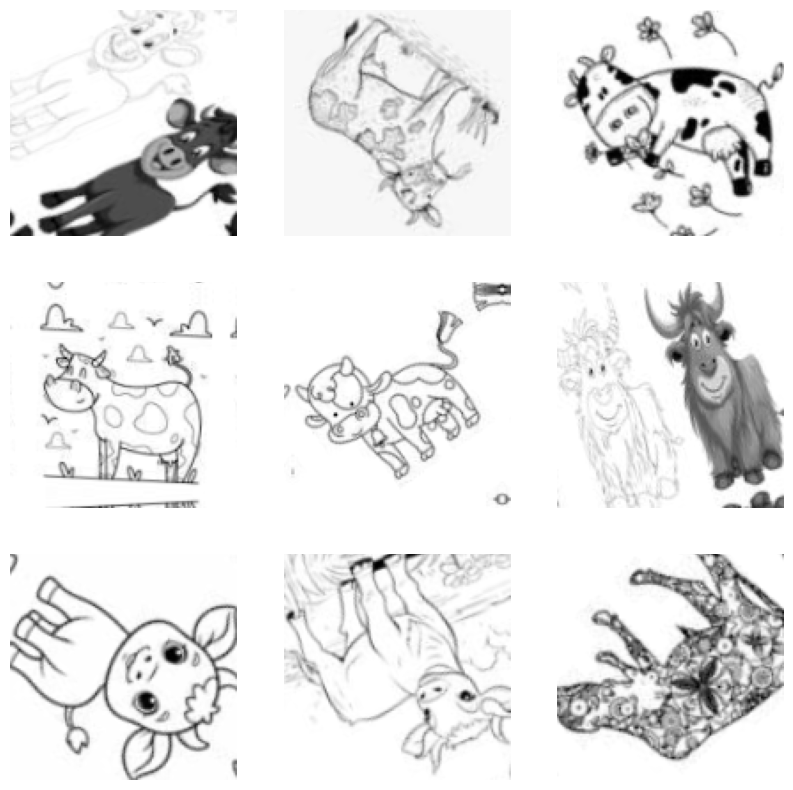

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# 1. Charger les images
def load_and_preprocess_images(dossier, img_height, img_width, batch_size):
    # Charger les images depuis le dossier
    dataset = image_dataset_from_directory(
        dossier,
        image_size=(img_height, img_width),
        color_mode="grayscale",  # Chargement en niveaux de gris
        batch_size=batch_size
    )
    
    # Normaliser les images entre -1 et 1
    normalization_layer = layers.Rescaling(1./127.5, offset=-1)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))
    return dataset

# 2. Data augmentation
def create_data_augmentation_layer():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),  # Flip horizontal et vertical
        layers.RandomRotation(0.2),                   # Rotation aléatoire
        layers.RandomZoom(0.2),                       # Zoom aléatoire
    ])

# 3. Charger et préparer les données
dossier = "D:/scrapping/images"
img_height = 128
img_width = 128
batch_size = 32

# Charger et normaliser les images
dataset = load_and_preprocess_images(dossier, img_height, img_width, batch_size)

# Ajouter la data augmentation
augmentation_layer = create_data_augmentation_layer()
augmented_dataset = dataset.map(lambda x, y: (augmentation_layer(x), y))

# 4. Afficher des exemples pour vérifier
import matplotlib.pyplot as plt

for images, labels in augmented_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(tf.squeeze(images[i] + 1) / 2, cmap='gray')  # Revenir à [0, 1] pour affichage
        plt.axis("off")
    plt.show()

In [ ]:
train_gan(generator, discriminator, gan, dataset, epochs=10000, batch_size=32)

Époque 1/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 64, 64, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_52 (LeakyReLU)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 32, 32, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_53 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │       131,073 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337,665 (1.29 MB)

 Trainable params: 337,665 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

AttributeError: 'NoneType' object has no attribute 'update_state'

Nouvel tentative avec : https://www.tensorflow.org/tutorials/generative/dcgan?hl=fr

In [ ]:
from IPython.display import display, clear_output

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    assert model.output_shape == (None, 8, 8, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 8, 8, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(4, 4), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(4, 4), padding='same', use_bias=False, activation='tanh'))
    print(model.output_shape)
    assert model.output_shape == (None, 128, 128, 1)

    return model

(None, 128, 128, 1)


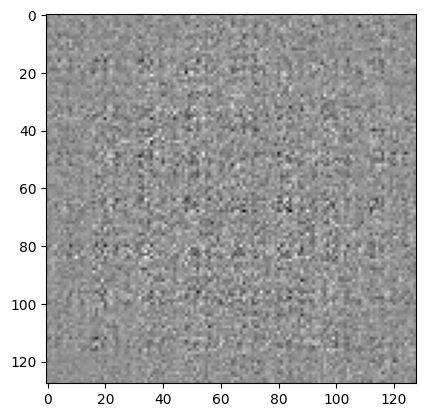

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[128, 128, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-1.6642574e-05]], shape=(1, 1), dtype=float32)


C:\Users\romeo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 100000
noise_dim = 100
num_examples_to_generate = 16
BATCH_SIZE = 32

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
  noise = tf.random.normal([BATCH_SIZE, noise_dim])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training=True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return gen_loss, disc_loss

In [ ]:

def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch,_ in dataset:
      
      gen_loss, disc_loss = train_step(image_batch)

    # Save the model every 200 epochs
    if (epoch + 1) % 10000 == 0:
      generate_and_save_images(generator,
                            epochs,
                            seed)
      checkpoint.save(file_prefix = checkpoint_prefix)
      print(f"[D loss: {disc_loss:.4f}  [G loss: {gen_loss:.4f}]")

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
train(augmented_dataset, EPOCHS)

Time for epoch 1 is 0.3943209648132324 sec
Time for epoch 2 is 0.3859395980834961 sec
Time for epoch 3 is 0.38334035873413086 sec
Time for epoch 4 is 0.38427019119262695 sec
Time for epoch 5 is 0.38338613510131836 sec
Time for epoch 6 is 0.3838036060333252 sec
Time for epoch 7 is 0.3782031536102295 sec
Time for epoch 8 is 0.3831479549407959 sec
Time for epoch 9 is 0.3803112506866455 sec
Time for epoch 10 is 0.38249707221984863 sec
Time for epoch 11 is 0.38305091857910156 sec
Time for epoch 12 is 0.3784782886505127 sec
Time for epoch 13 is 0.39706897735595703 sec
Time for epoch 14 is 0.3940279483795166 sec
Time for epoch 15 is 0.38121557235717773 sec
Time for epoch 16 is 0.37970495223999023 sec
Time for epoch 17 is 0.3803246021270752 sec
Time for epoch 18 is 0.3806915283203125 sec
Time for epoch 19 is 0.38628673553466797 sec
Time for epoch 20 is 0.386791467666626 sec
Time for epoch 21 is 0.3789820671081543 sec
Time for epoch 22 is 0.39523911476135254 sec
Time for epoch 23 is 0.378057956

KeyboardInterrupt: 